   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

C:\Users\anish\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:29:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results:
[[56852    12]
 [   20    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



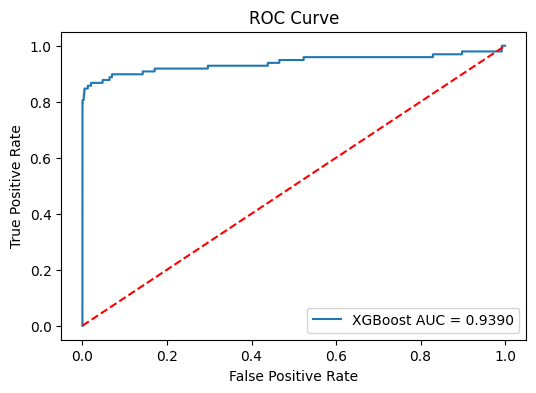

In [2]:
# Fraud Detection in Credit Card Transactions

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from xgboost import XGBClassifier

# Step 2: Load Dataset
# (Download dataset from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
df = pd.read_csv("creditcard.csv")
print(df.head())

# Step 3: Data Preprocessing
# Separate features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Standardize "Amount" feature
scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])

print("Class Distribution:\n", y.value_counts())

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Apply Isolation Forest
iso = IsolationForest(contamination=0.001, random_state=42)
y_pred_iso = iso.fit_predict(X_test)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]  # -1 = outlier → fraud

print("\nIsolation Forest Results:")
print(confusion_matrix(y_test, y_pred_iso))
print(classification_report(y_test, y_pred_iso))

# Step 6: Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001)
y_pred_lof = lof.fit_predict(X_test)
y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof]

print("\nLocal Outlier Factor Results:")
print(confusion_matrix(y_test, y_pred_lof))
print(classification_report(y_test, y_pred_lof))

# Step 7: Train XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Results:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Step 8: Plot ROC Curve
y_probs = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"XGBoost AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 9: (Optional) Deploy as Web App
# You can later use Streamlit or Flask to build a dashboard for predictions.


In [5]:
import pickle

# Example: assuming you trained a Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


C:\Users\anish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
with open("requirements.txt", "w") as f:
    f.write("streamlit\npandas\nnumpy\nscikit-learn\nxgboost\nmatplotlib\nseaborn\n")
